In [88]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [89]:
# Load the training data into a pandas DataFrame (assuming you have a CSV file)
train_data = pd.read_csv('preprocessed_data_bbc.csv')

# Extract the cleaned text and corresponding labels
X = train_data['Text'].values
y = train_data['Category'].values

# Convert the text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(min_df=0.002, max_df=0.95, norm='l2', ngram_range=(1, 2), stop_words='english', sublinear_tf=True)
X = vectorizer.fit_transform(X)

In [80]:
# build RandomForest model
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X, train_data.Category)

# checking the oob score
classifier_rf.oob_score_

0.8684563758389262

# Improve Random Forest model

In [42]:

from sklearn.model_selection import GridSearchCV
# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X, train_data.Category)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [43]:
classifier_rf.oob_score_
# get the best score
rf_best_score = grid_search.best_score_
print("\nRandom Forest best score: {:.3f}%".format(rf_best_score*100))

# best model
rf_best = grid_search.best_estimator_
print("\nRandom Forest best model:", rf_best)


Random Forest best score: 94.700%

Random Forest best model: RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)


After finding the best Random Forest model,i run it again 

In [90]:
# build RandomForest model
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)
classifier_rf.fit(X, train_data.Category)

# checking the oob score
classifier_rf.oob_score_

0.9442953020134228

In [91]:
# Predict the labels for the training data
y_pred = classifier_rf.predict(X)

# Generate the classification report
report = classification_report(y, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.99      0.97       336
entertainment       0.99      0.98      0.99       273
     politics       0.98      0.96      0.97       274
        sport       0.97      1.00      0.98       346
         tech       0.99      0.95      0.97       261

     accuracy                           0.98      1490
    macro avg       0.98      0.97      0.98      1490
 weighted avg       0.98      0.98      0.98      1490



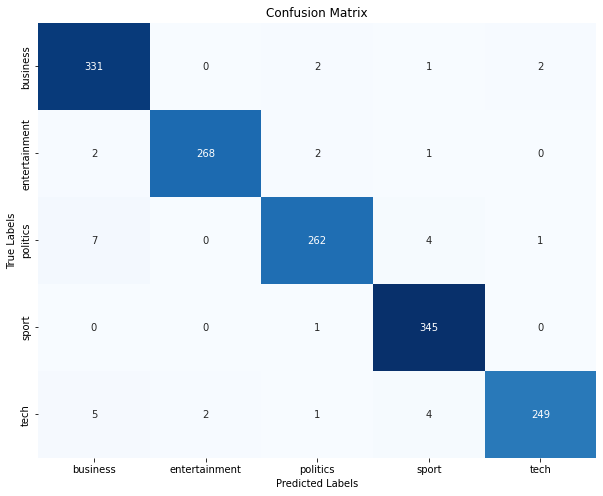

In [92]:
# Predict the labels for the training data
y_pred = classifier_rf.predict(X)

# Generate the confusion matrix
cm = confusion_matrix(y, y_pred)

# Get the unique category labels
categories = np.unique(y)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




# Effect of the data size on supervised Random Forest model
I'm using Learning Curve to determine cross-validated training and test scores for different training set sizes.

A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

In [47]:
from sklearn.model_selection import learning_curve

print('Learning curve for Random Forest model\n')
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(classifier_rf, X, y, verbose=3)

Learning curve for Random Forest model

[learning_curve] Training set sizes: [ 119  387  655  923 1192]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.739, test=0.450) total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ..................., score=(train=0.984, test=0.913) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ..................., score=(train=0.983, test=0.936) total time=   0.3s
[CV] END ..................., score=(train=0.978, test=0.936) total time=   0.4s
[CV] END ..................., score=(train=0.980, test=0.940) total time=   0.5s
[CV] END ..................., score=(train=0.807, test=0.584) total time=   0.2s
[CV] END ..................., score=(train=0.972, test=0.893) total time=   0.3s
[CV] END ..................., score=(train=0.983, test=0.916) total time=   0.3s
[CV] END ..................., score=(train=0.982, test=0.909) total time=   0.4s
[CV] END ..................., score=(train=0.978, test=0.923) total time=   0.5s
[CV] END ..................., score=(train=0.807, test=0.584) total time=   0.2s
[CV] END ..................., score=(train=0.979, test=0.919) total time=   0.2s
[CV] END ..................., score=(train=0.973, test=0.933) total time=   0.3s
[CV] END ..................., score=(train=0.974, test=0.966) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   13.1s finished


In [48]:
def plot_learning_curve(train_sizes, train_scores, test_scores, fig_title):  
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
    plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title(fig_title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

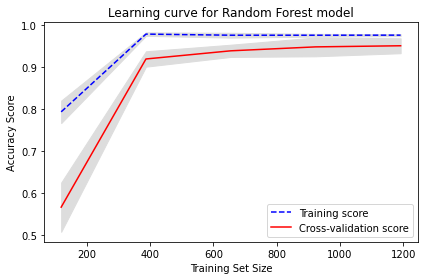

In [25]:
# Plot learning curves
plot_learning_curve(train_sizes, train_scores, test_scores,'Learning curve for Random Forest model')

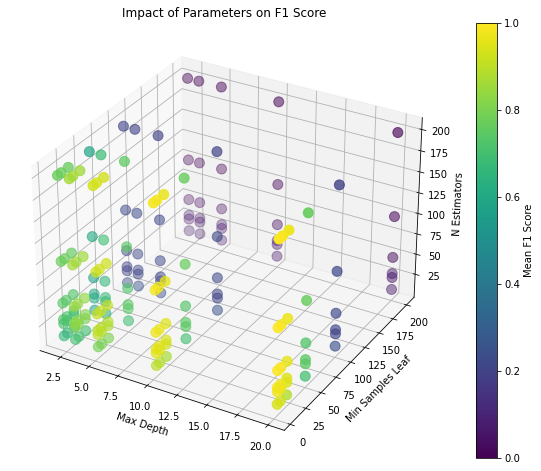

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Get the parameter values
max_depth_values = [param['max_depth'] for param in params]
min_samples_leaf_values = [param['min_samples_leaf'] for param in params]
n_estimators_values = [param['n_estimators'] for param in params]

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the F1 scores
ax.scatter(max_depth_values, min_samples_leaf_values, n_estimators_values, c=mean_f1_scores, cmap='viridis', s=100)

# Set axis labels
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Leaf')
ax.set_zlabel('N Estimators')

# Set colorbar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.ax.set_ylabel('Mean F1 Score')

# Set title
plt.title('Impact of Parameters on F1 Score')

# Show the plot
plt.show()




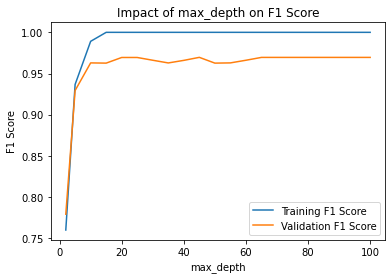

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of max_depth values to test
max_depth_values = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


train_scores = []
val_scores = []

for max_depth in max_depth_values:
    # Create a Random Forest classifier with the current max_depth value
    classifier_rf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    
    # Train the model on the training set
    classifier_rf.fit(X_train, y_train)
    
    # Predict the labels for training and validation sets
    y_train_pred = classifier_rf.predict(X_train)
    y_val_pred = classifier_rf.predict(X_val)
    
    # Calculate the F1 scores for training and validation sets
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Append the scores to the lists
    train_scores.append(train_f1)
    val_scores.append(val_f1)

# Plot the max_depth vs. F1 score graph
plt.plot(max_depth_values, train_scores, label='Training F1 Score')
plt.plot(max_depth_values, val_scores, label='Validation F1 Score')
plt.xlabel('max_depth')
plt.ylabel('F1 Score')
plt.title('Impact of max_depth on F1 Score')
plt.legend()
plt.show()


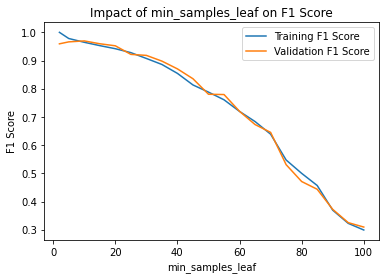

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of min_samples_leaf values to test
min_samples_leaf_values = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

train_scores = []
val_scores = []

for min_samples_leaf in min_samples_leaf_values:
    # Create a Random Forest classifier with the current min_samples_leaf value
    classifier_rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Train the model on the training set
    classifier_rf.fit(X_train, y_train)
    
    # Predict the labels for training and validation sets
    y_train_pred = classifier_rf.predict(X_train)
    y_val_pred = classifier_rf.predict(X_val)
    
    # Calculate the F1 scores for training and validation sets
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Append the scores to the lists
    train_scores.append(train_f1)
    val_scores.append(val_f1)

# Plot the min_samples_leaf vs. F1 score graph
plt.plot(min_samples_leaf_values, train_scores, label='Training F1 Score')
plt.plot(min_samples_leaf_values, val_scores, label='Validation F1 Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('F1 Score')
plt.title('Impact of min_samples_leaf on F1 Score')
plt.legend()
plt.show()


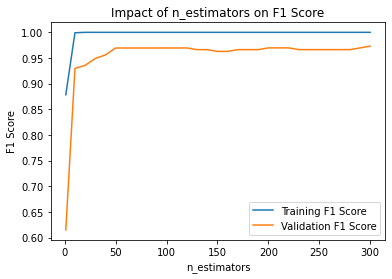

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of n_estimators values to test
n_estimators_values = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]


train_scores = []
val_scores = []

for n_estimators in n_estimators_values:
    # Create a Random Forest classifier with the current n_estimators value
    classifier_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model on the training set
    classifier_rf.fit(X_train, y_train)
    
    # Predict the labels for training and validation sets
    y_train_pred = classifier_rf.predict(X_train)
    y_val_pred = classifier_rf.predict(X_val)
    
    # Calculate the F1 scores for training and validation sets
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Append the scores to the lists
    train_scores.append(train_f1)
    val_scores.append(val_f1)

# Plot the n_estimators vs. F1 score graph
plt.plot(n_estimators_values, train_scores, label='Training F1 Score')
plt.plot(n_estimators_values, val_scores, label='Validation F1 Score')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('Impact of n_estimators on F1 Score')
plt.legend()
plt.show()


# Export model


In [100]:
import joblib
joblib.dump(classifier_rf, 'model_rf.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')



['vectorizer.pkl']